## Grid Search Hyperparameter optimization

This case study is all about using grid searches to identify the optimal parameters for a machine learning algorithm. To complere this case study, you'll use the Pima Indian diabetes dataset from Kaggle and KNN. Follow along with the preprocessing steps of this case study.

Load the necessary packages

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set random seed to try make this exercise and solutions reproducible (NB: this is just for teaching purpose and not something you would do in real life)
random_seed_number = 42
np.random.seed(random_seed_number)

#### Load the diabetes data

In [154]:
diabetes_data = pd.read_csv('data/diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**<font color='teal'> Start by reviewing the data info.</font>**

In [155]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**<font color='teal'> Apply the describe function to the data.</font>**

In [156]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**<font color='teal'> Currently, the missing values in the dataset are represented as zeros. Replace the zero values in the following columns ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] with nan .</font>**

In [157]:
for i in ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] :
    diabetes_data[i].replace(0,np.nan,inplace= True )

diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [158]:
diabetes_data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

**<font color='teal'> Plot histograms of each column. </font>**

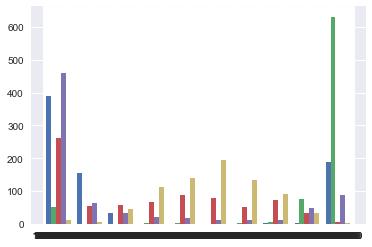

In [159]:
plt.hist(diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']])
plt.show()

#### Replace the zeros with mean and median values.

In [160]:
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)

**<font color='teal'> Plot histograms of each column after replacing nan. </font>**

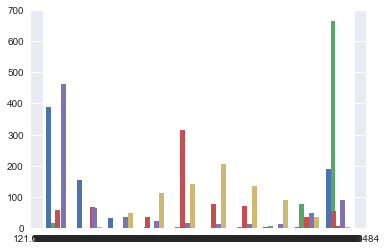

In [161]:
plt.hist(diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']])
plt.show()

#### Plot the correlation matrix heatmap

Correlation between various features


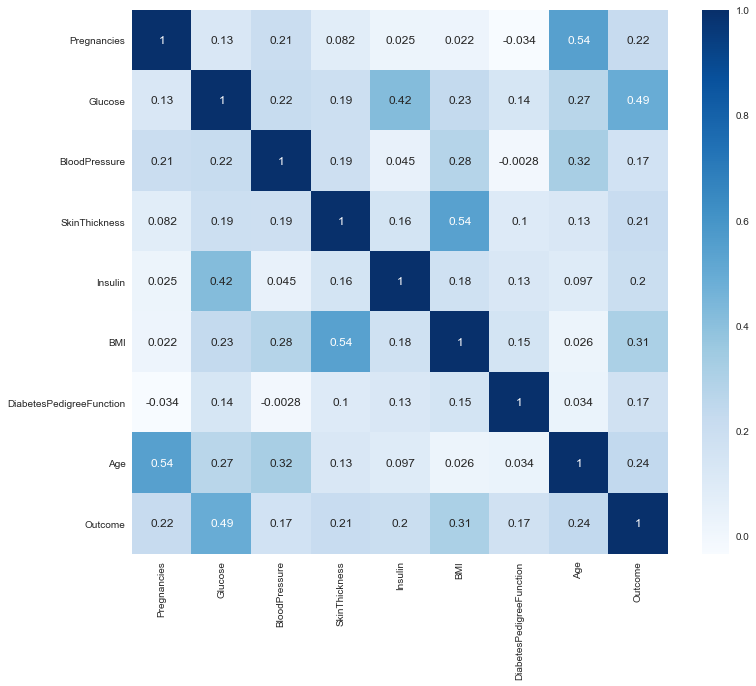

In [162]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='Blues')
plt.show()

**<font color='teal'> Define the `y` variable as the `Outcome` column.</font>**

In [163]:
y = diabetes_data['Outcome']
X = diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]

**<font color='teal'> Create a 70/30 train and test split. </font>**

In [164]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = train_test_split (X,y,random_state=40,test_size = .70)

**<font color='teal'> Using Sklearn, standarize the magnitude of the features by scaling the values. </font>**

Note: Don't forget to fit() your scaler on X_train and then use that fitted scaler to transform() X_test. This is to avoid data leakage while you standardize your data.

In [165]:
from sklearn.preprocessing import StandardScaler 
std_scaler = StandardScaler()  

In [166]:
std_scaler.fit(X_train)
X_train = std_scaler.transform(X_train)
X_test = std_scaler.transform(X_test)


In [167]:
print(X_test),print(X_train)

[[ 1.76238388  0.72147085  2.35300914  4.03305662  0.79009284]
 [ 0.76832138  0.72147085 -0.35726317  1.79861642 -0.12236335]
 [ 1.7966619  -1.20511533 -0.85003995  0.66898276  0.0059508 ]
 ..., 
 [ 0.18559508  0.560922    0.99787298  0.86759967  0.49069315]
 [ 0.28842913 -0.24182224  0.01231942 -0.18755265  0.19129346]
 [ 2.65361234  0.23982431  1.73703816 -0.18755265  1.43166359]]
[[-0.3628532  -0.64319436  0.01231942 -0.18755265 -1.17739082]
 [-0.97985751 -1.04456648  0.01231942 -0.18755265  0.34812187]
 [-1.1512476  -0.56291993 -0.97323415 -1.45373543 -1.20590507]
 ..., 
 [-0.22574113 -0.04874746  0.01231942 -0.18755265  0.34812187]
 [-0.32857518 -0.56291993  0.01231942 -0.18755265  0.70455007]
 [ 0.01420499 -0.72346878  0.38190201  0.19726761  0.31960762]]


(None, None)

#### Using a range of neighbor values of 1-10, apply the KNearestNeighbor classifier to classify the the data.

In [168]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,11):

    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

**<font color='teal'> Print the train and test scores for each iteration.</font>**

**<font color='teal'> Identify the number of neighbors that resulted in the max score in the training dataset. </font>**

In [169]:
for i in range(0,10):
    print ('Train score is {} and test score is {}'.format(train_scores[i],test_scores[i]))

Train score is 1.0 and test score is 0.6802973977695167
Train score is 0.8434782608695652 and test score is 0.7026022304832714
Train score is 0.8217391304347826 and test score is 0.7304832713754646
Train score is 0.8173913043478261 and test score is 0.6933085501858736
Train score is 0.8 and test score is 0.7323420074349443
Train score is 0.782608695652174 and test score is 0.7230483271375465
Train score is 0.7956521739130434 and test score is 0.7434944237918215
Train score is 0.8 and test score is 0.7304832713754646
Train score is 0.8043478260869565 and test score is 0.7286245353159851
Train score is 0.7695652173913043 and test score is 0.7434944237918215


In [170]:
1

1

**<font color='teal'> Identify the number of neighbors that resulted in the max score in the testing dataset. </font>**

In [171]:
7

7

Plot the train and test model performance by number of neighbors.

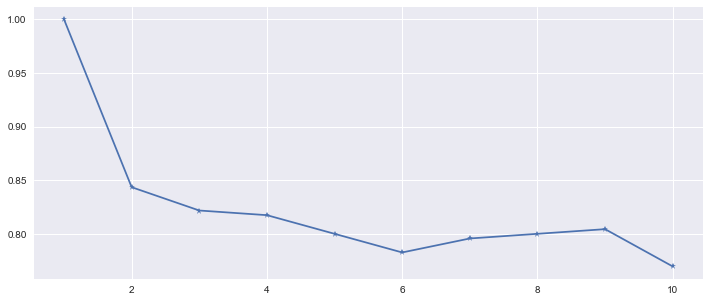

In [172]:
plt.figure(figsize=(12,5))
p = plt.plot(range(1,11),train_scores,marker='*',label='Train Score')
plt.show()

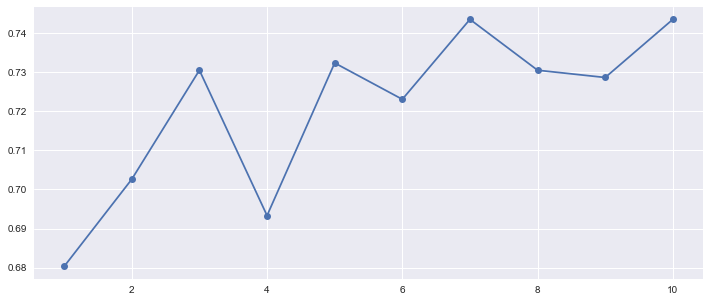

In [173]:
plt.figure(figsize=(12,5))
p = plt.plot(range(1,11),test_scores,marker='o',label='Test Score')
plt.show()

**<font color='teal'> Fit and score the best number of neighbors based on the plot. </font>**

In [174]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [175]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
p1 = confusion_matrix(y_test,y_pred)

**<font color='teal'> Plot the confusion matrix for the model fit above. </font>**

In [176]:
print (p1)

[[289  58]
 [ 80 111]]


**<font color='teal'> Print the classification report </font>**

In [177]:
from sklearn.metrics import classification_report
y_pred = knn.predict(X_test)
p2 = classification_report(y_test,y_pred)

In [178]:
print (p2)

             precision    recall  f1-score   support

          0       0.78      0.83      0.81       347
          1       0.66      0.58      0.62       191

avg / total       0.74      0.74      0.74       538



#### In the case of the K nearest neighbors algorithm, the K parameter is one of the most important parameters affecting the model performance.  The model performance isn't horrible, but what if we didn't consider a wide enough range of values in our neighbors for the KNN? An alternative to fitting a loop of models is to use a grid search to identify the proper number. It is common practice to use a grid search method for all adjustable parameters in any type of machine learning algorithm. First, you define the grid — aka the range of values — to test in the parameter being optimized, and then compare the model outcome performance based on the different values in the grid.

#### Run the code in the next cell to see how to implement the grid search method for identifying the best parameter value for the n_neighbors parameter. Notice the param_grid is the range value to test and we apply cross validation with five folds to score each possible value of n_neighbors.

In [179]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

#### Print the best score and best parameter for n_neighbors.

In [180]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.75
Best Parameters: {'n_neighbors': 22}


Here you can see that the ideal number of n_neighbors for this model is 22 based on the grid search performed. 

**<font color='teal'> Now, following the KNN example, apply this grid search method to find the optimal number of estimators in a Randon Forest model.
</font>**

In [181]:
from sklearn.ensemble import RandomForestClassifier
#random = RandomForestClassifier(n_estimators = 30)

In [182]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators':np.arange(1,50)}
rft = RandomForestClassifier()
rft_cv = GridSearchCV(rft,param_grid,cv=5)
rft_cv.fit(X,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [183]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.75
Best Parameters: {'n_neighbors': 22}
